In [1]:
# classifier based only on petal width
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [13]:
X = iris["data"][:, (2,3)] # petal width

In [14]:
y = (iris["target"] == 2).astype(np.int) # binary classifier, 1 if Iris-Virginica else 0

In [15]:
# train logistic regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [17]:
y_proba = log_reg.predict_proba(X_new)

ValueError: X has 1 features per sample; expecting 2

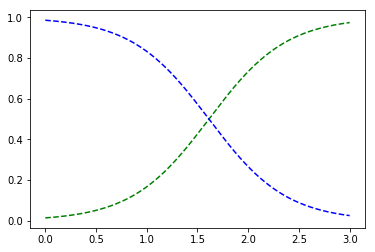

In [18]:
plt.plot(X_new, y_proba[:, 1], "g--", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

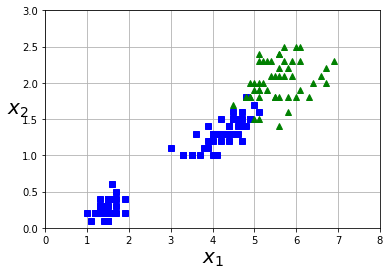

In [27]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_dataset(X, y, [0, 8, 0, 3])
plt.show()

In [31]:
# using LinearSVC

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

linear_svc_clf = Pipeline([
    ("std_scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=10, loss="hinge"))
])

linear_svc_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

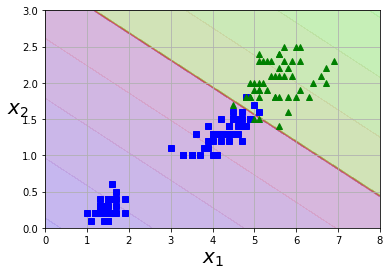

In [38]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(linear_svc_clf,  [0, 8, 0, 3])
plot_dataset(X, y,  [0, 8, 0, 3])

#save_fig("moons_polynomial_svc_plot")
plt.show()

In [39]:
# using SVC
from sklearn.svm import SVC

svc_clf = Pipeline([
    ("std_scaler", StandardScaler()),
    ("svc_clf", SVC(kernel="linear", coef0=1, C=10))
])

svc_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc_clf', SVC(C=10, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

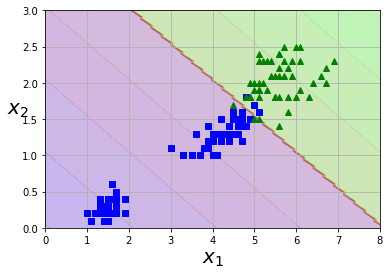

In [41]:
plot_predictions(svc_clf,  [0, 8, 0, 3])
plot_dataset(X, y,  [0, 8, 0, 3])

#save_fig("moons_polynomial_svc_plot")
plt.show()

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline([
    ("std_scaler", StandardScaler()),
    ("sgd_clf", SGDClassifier())
])

sgd_clf.fit(X, y)

/home/gautam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgd_clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

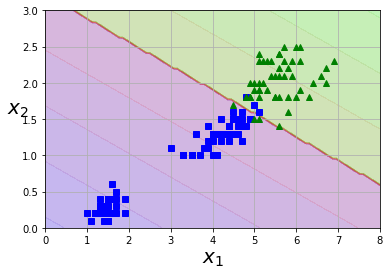

In [43]:
plot_predictions(sgd_clf,  [0, 8, 0, 3])
plot_dataset(X, y,  [0, 8, 0, 3])